<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/class/HW2_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 - Won't You Be My Neighbor?
In this assignment you will write your own simplified version of a Nearest Neighbors classifier and test it out on the famous Iris dataset. The code for loading our data is below--use it without modifications.  You need to perform a few tasks to convince me that your classifier works.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

## Requirements
* "Hours of coding will save you minutes of design".  Make a plan first.
* You do not _need_ to make a class or define functions, but some functions will make your life easier
* You are submitting a **report**, not just a program.  You need to use the template below where your code is interspersed with markdown cells for discussion and explanations.
* Yes: in the template you need to restate (not copy) the problem description and _explain_ the solution method.  **Do not skip any sections.**

## A note on functions:
Defining functions makes your life easier.  For example, take a gross thing you have to do lots of times.  Instead of copying and pasting make a function  

In [2]:
def dist2(a,b):
    """Returns the distance squared between 1D numpy arrays a and b"""
    return( ((a-b)**2).sum() )

In [3]:
a = np.array([1,2])
b = np.array([5,4])
dist2(a,b)

20

## The Iris Dataset
We'll use the same dataset as the last homework, but lets keep all 3 species

In [4]:
data = datasets.load_iris()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

Features:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:	 ['setosa' 'versicolor' 'virginica']


The first four columns are input features, and the _species_ column is the target class.  Let's see what the species are:

# Digression on Scatter Plots
It helps to *visualize* the nearest neighbors plots, so let's briefly talk about making scatter plots.  Let's choose two features and start plotting.



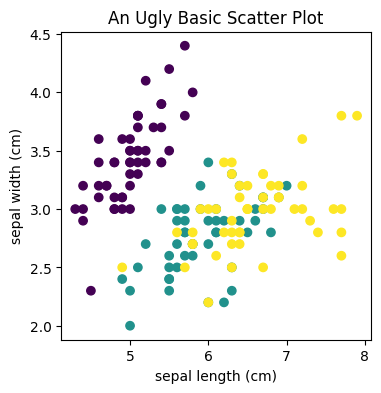

In [5]:
fx = 0 # feature number to plot on x axis
fy = 1 # feature number to plot on y axis

plt.figure(figsize=(4,4))
plt.scatter(X[:, fx], X[:, fy], marker='o', c=y)  #,s=25)  #, cmap=cmap_bold)
plt.title('An Ugly Basic Scatter Plot')
plt.xlabel(data.feature_names[fx])
plt.ylabel(data.feature_names[fy])
plt.show()

Two obvious issues:
1.  The colors are... interesting.
1.  We need a legend (which is surprisingly hard with scatter plots)

We will deal with colors first:

In [6]:
# Define Custom Colors
from matplotlib.colors import ListedColormap
colors_bold = ['#FF0000', '#00FF00', '#0000FF']
cmap_bold = ListedColormap(colors_bold)

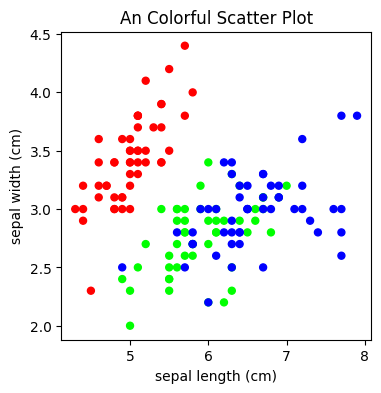

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, fx], X[:, fy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
plt.title('An Colorful Scatter Plot')
plt.xlabel(data.feature_names[fx])
plt.ylabel(data.feature_names[fy])
plt.show()

## Making Legends

Here's a few options:

1.  Use the automagic legend generator code:
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html.
These get difficult to edit and control...

1.  Use scatterplots but add custom text to make a legend

1.  Semi-automatic: give up the conveinence of scatter plots and make normal plots with labels you can control

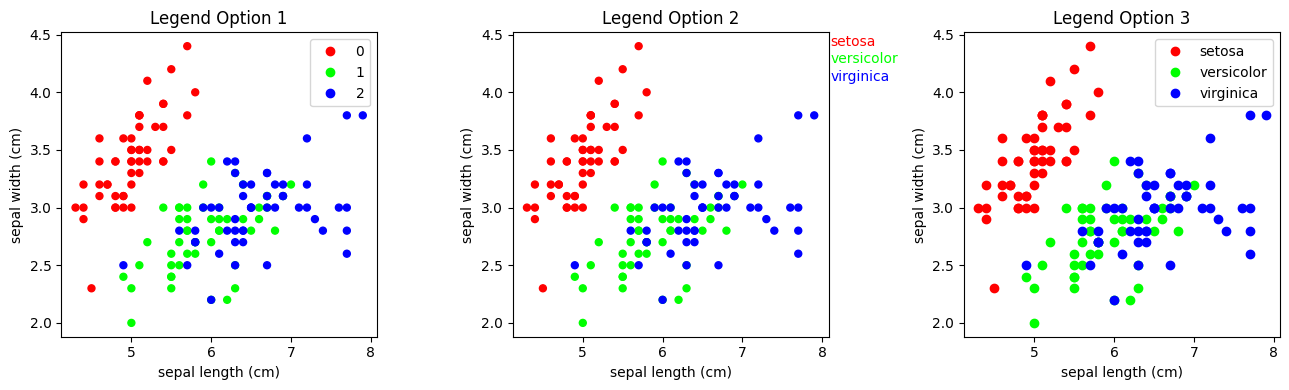

In [8]:
# Three Ways of Making Legends
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)  # Option 1
s = plt.scatter(X[:, fx], X[:, fy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
plt.legend(*s.legend_elements()) # adds scatterplot to legend
plt.title('Legend Option 1')
plt.xlabel(data.feature_names[fx])
plt.ylabel(data.feature_names[fy])


plt.subplot(1,3,2)  # Option 2
plt.scatter(X[:, fx], X[:, fy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
for i in range(3):
  plt.text(8.1,4.4-0.15*i,data.target_names[i],color=colors_bold[i]) # Make Custom Legend
plt.title('Legend Option 2')
plt.xlabel(data.feature_names[fx])
plt.ylabel(data.feature_names[fy])


plt.subplot(1,3,3)  # Option 3
NUM_CLASSES = 3
for i in range(NUM_CLASSES):
  plt.plot(X[y==i, fx], X[y==i, fy], 'o',color=colors_bold[i], label=data.target_names[i])
plt.title('Legend Option 3')
plt.xlabel(data.feature_names[fx])
plt.ylabel(data.feature_names[fy])
plt.legend()

plt.tight_layout()
plt.show()

# Problem 1
We will look at only 2 features so we can easily make plots.  Your job is to:
* find the nearest neighbor to the given point
* make a nice, proper plot to convince me your answer is right

Your code is equivalent to the ```predict``` function of a $k=1$ nearest neighbors classifier.  

*NOTE:* Do not simply use the built-in scikit-learn kNN classifier--you have to make one yourself.  (Starting on the next assignment you will get to use sklearn, and hopefully by then you'll have a good feel for how it works.)




In [12]:
# Make a 2-feature version of X using only the first two columns
fx = 0 # feature number to plot on x axis
fy = 1 # feature number to plot on y axis

X2 = X[:,[fx,fy]]   # 2D version
print(X2.shape)

(150, 2)


In [13]:
# The point to predict
X2_pred = np.array([[6.5, 3.8]])    # note that this is a 2D array like X

# Problem 2
Now consider the (unplottable) 4-feature original dataset.  Your job is to predict the given points using all 4 features by finding the nearest neighbor.

In [11]:
# Generate new dataset to classify
means = X.mean(axis=0).reshape(1,-1)
X_pred, _ = datasets.make_blobs(n_samples=10, n_features=4, centers=means, cluster_std = 1, random_state=3  )

print('The points to classify:')
print(X_pred)

The points to classify:
[[ 5.07449698  2.82730261  4.50305627  3.17544412]
 [ 5.29797339  1.51085602  4.74036743  0.0982657 ]
 [ 4.81954819  2.34434013  4.38324497  1.03881997]
 [ 5.56594513  2.70257435  3.67525852  0.57233266]
 [ 4.65828681  2.85168343  5.24414836  1.4360496 ]
 [ 4.91954131  2.03345757  4.88197796  1.0674191 ]
 [ 6.72465138  4.7669064   3.80803364  0.79465592]
 [ 4.59921     2.43091642  2.95423391 -1.21974984]
 [ 5.79951516  2.5801153   2.44413525  2.08395571]
 [ 7.63196181  3.49384318  3.85449747 -0.66415937]]


Good luck.  Have fun.